Importing the necessary libraries

In [2]:
from sklearn.datasets import make_blobs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Generating the database (Generated a random collection of 1000 points and distributed them into 3 classes)

In [6]:
inputs, target = make_blobs(n_samples = 1000, centers = [(-3,3), (0,0), (2,2)],
                            random_state = 365)

In [7]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [8]:
data = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])
data['Target'] = target #add 3rd column
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


Plotting the database

In [9]:
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

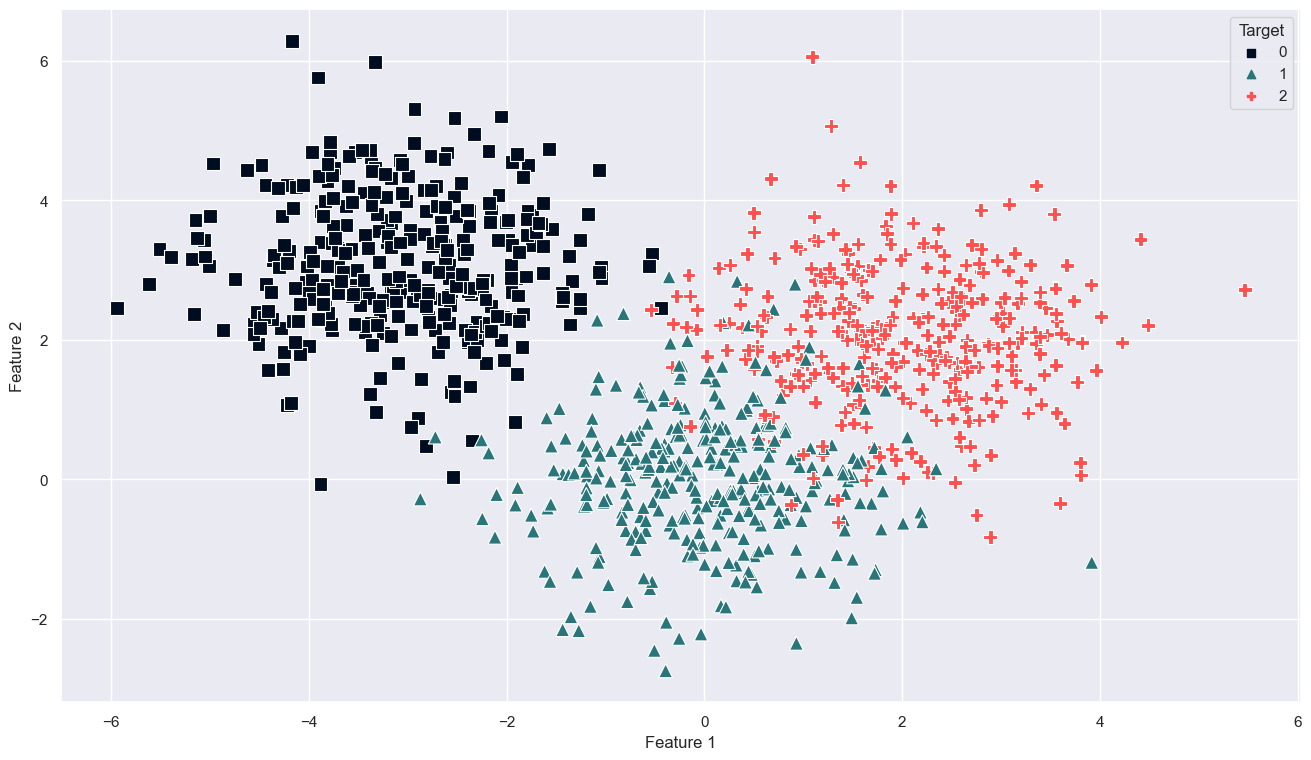

In [62]:
sns.set()

plt.figure(figsize = (16,9))

sns.scatterplot(x = 'Feature 1', y = 'Feature 2',
                 data = data,
                 hue = 'Target', palette = knn_palette, 
                 markers= [',', '^', 'P'],
                 style = 'Target',
                 s = 100)

Visualizing the distribution of the points

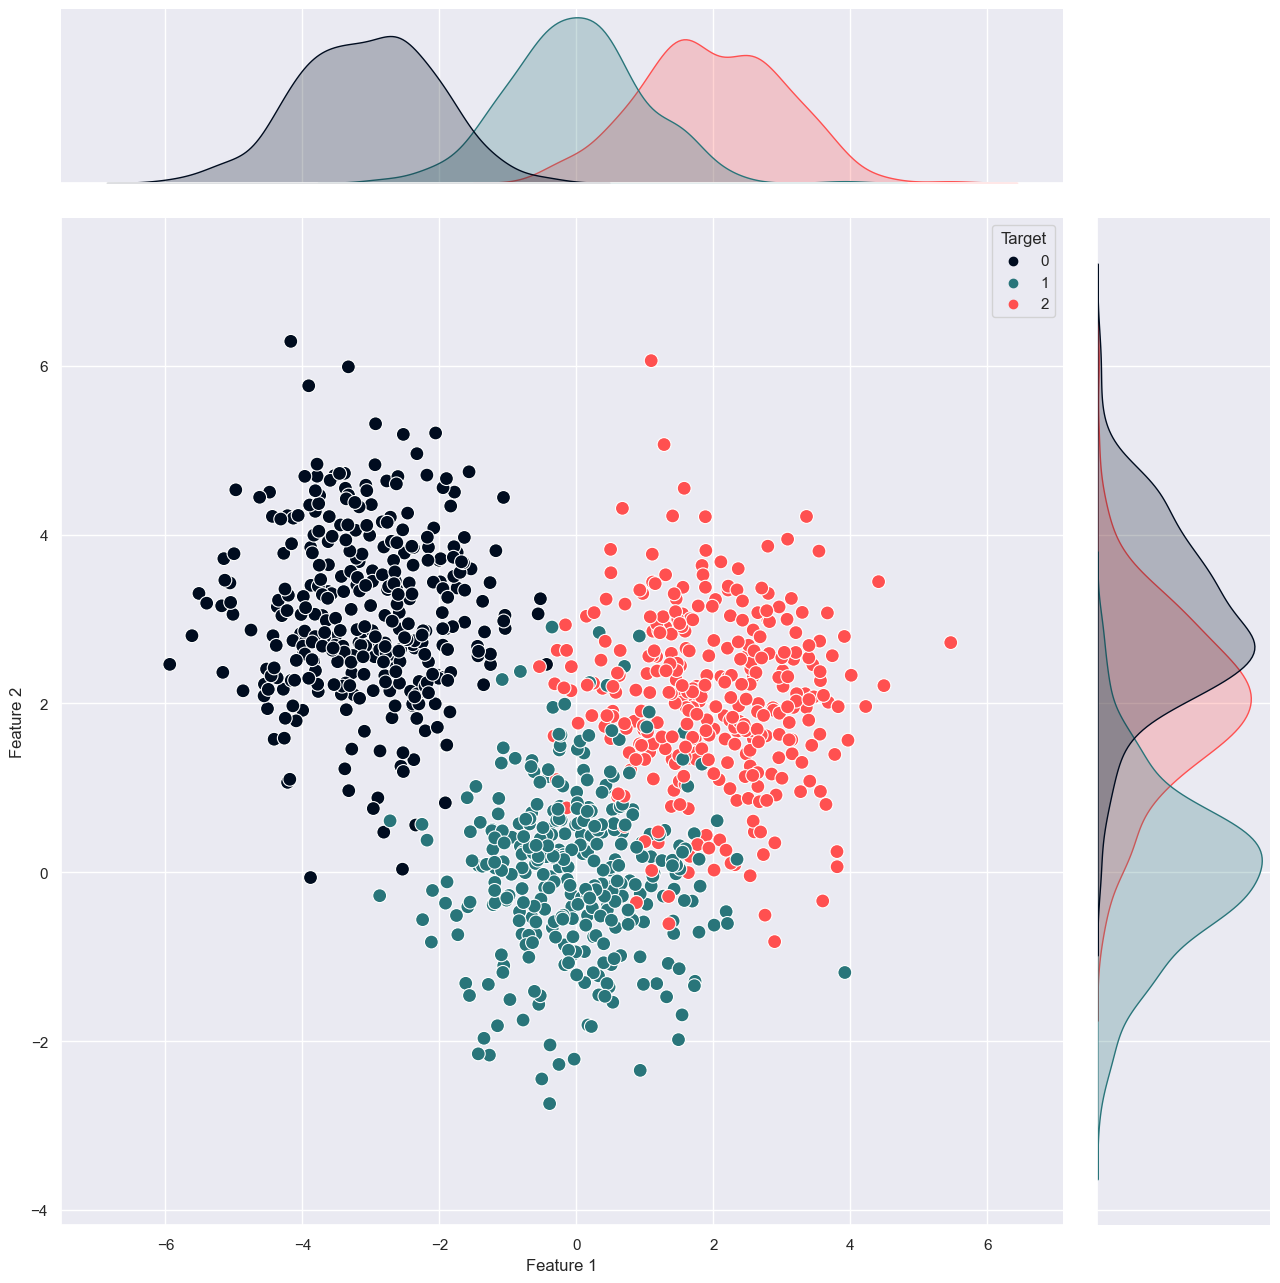

In [31]:
sns.set()

sns.jointplot(x = 'Feature 1', y = 'Feature 2',
                 data = data,
                 hue = 'Target', 
                 palette = knn_palette,
                 markers= [',', '^', 'P'],  # markers for each class doesn't work! 
                 height = 13,
                 s = 100,
                 legend = True)

Creating a train-test-split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size = 0.2, 
                                                    random_state= 365,
                                                    stratify = target) #Each run shuffles the samples

Creating the model

In [12]:
clf = KNeighborsClassifier(n_neighbors = 1)  #Default value in sklearn: 5

clf.fit(x_train, y_train) #Fitting process stores the coordinates; very time-efficient

KNeighborsClassifier(n_neighbors=1)

Predicting a sample

In [34]:
feature_1 = -0.18
feature_2 = 3.2

In [35]:
clf.predict([[feature_1, feature_2]])

array([2])

In [36]:
neighbors = clf.kneighbors([[feature_1, feature_2]])
neighbors

(array([[0.27086818]]), array([[336]], dtype=int64))

Visualizing the neighbors

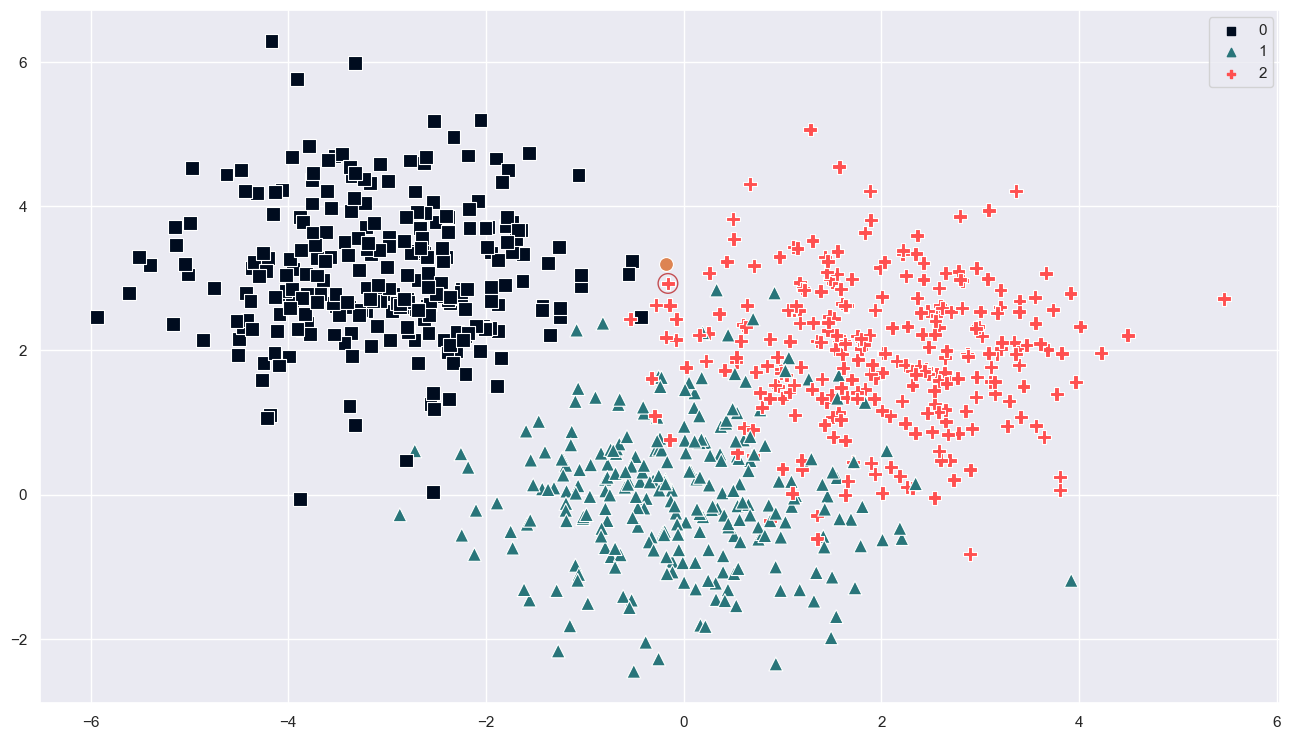

In [37]:
sns.set()

plt.figure(figsize = (16,9))


sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                 hue = y_train,
                 palette = knn_palette, 
                 markers= [',', '^', 'P'],
                 style = y_train,
                 s = 100,
                 legend = True)

sns.scatterplot(x = [feature_1], y = [feature_2],
                 style = [feature_2], 
                 markers= ['o'],
                 s = 100,
                 legend = False)

plot_x_train = []
plot_y_train = []

for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

plt.scatter(plot_x_train,
            plot_y_train,
            s=200, facecolors='none', edgecolors='r');


We have successfully created a plot that includes the training data, the point where we wish to classify and its nearest neighbor